In [1]:
pip install numpy==1.26.4 pmdarima==2.0.4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.gofplots import qqplot


In [3]:
from google.colab import files
uploaded=files.upload()

Saving INR-USD.csv to INR-USD.csv


In [15]:
data = pd.read_csv("INR-USD.csv")

In [16]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-12-2003,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,08-12-2003,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,15-12-2003,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,22-12-2003,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,29-12-2003,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [17]:
data.isnull().sum()

,0
Date,0
Open,3
High,3
Low,3
Close,3
Adj Close,3
Volume,3


In [18]:
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True, errors='coerce')


In [19]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [20]:
data.dropna(subset=["Date", "Close"], inplace=True)


In [21]:
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [22]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [23]:
data.sort_values("Date", inplace=True)


In [24]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
1,2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2,2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
3,2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
4,2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [25]:
data.set_index("Date", inplace=True)

In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0
2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0
2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0
2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0
2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0


In [27]:
# Add Year/Month columns
data["Year"] = data.index.year
data["Month"] = data.index.month

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month
Date,,,,,,,,
2003-12-01,45.709000,45.728001,45.449001,45.480000,45.480000,0.0,2003,12
2003-12-08,45.474998,45.507999,45.352001,45.451000,45.451000,0.0,2003,12
2003-12-15,45.450001,45.500000,45.332001,45.455002,45.455002,0.0,2003,12
2003-12-22,45.417000,45.549000,45.296001,45.507999,45.507999,0.0,2003,12
2003-12-29,45.439999,45.645000,45.421001,45.560001,45.560001,0.0,2003,12


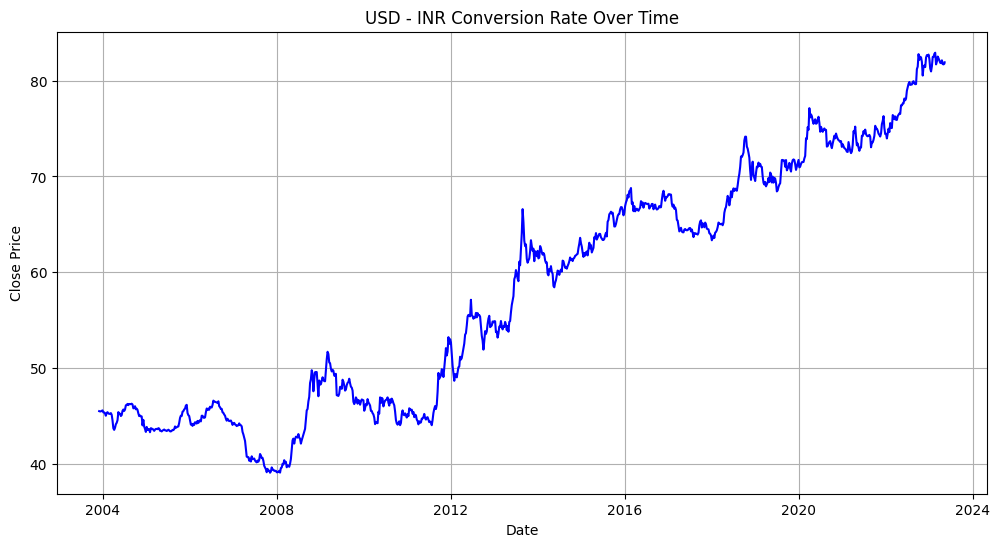

In [30]:
# ---------------------------
#    Time Series Plot
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], color='blue')
plt.title("USD - INR Conversion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

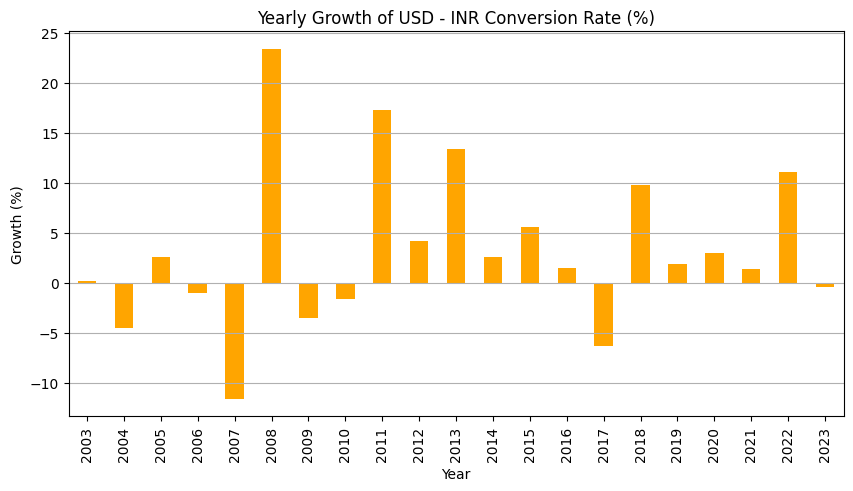

In [31]:
# ---------------------------
#     Yearly Growth
# ---------------------------
yearly_growth = data.groupby("Year")["Close"].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
plt.figure(figsize=(10, 5))
yearly_growth.plot(kind='bar', color='orange')
plt.title("Yearly Growth of USD - INR Conversion Rate (%)")
plt.ylabel("Growth (%)")
plt.grid(axis='y')
plt.show()

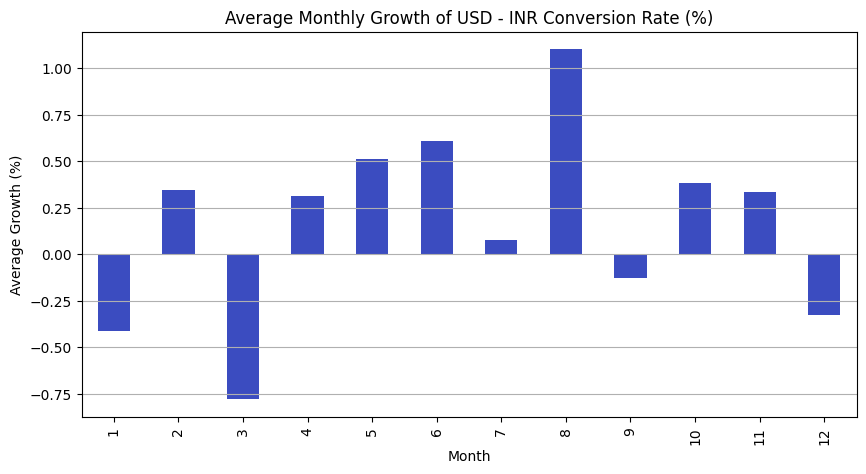

In [32]:
# ---------------------------
#    Monthly Average Growth
# ---------------------------
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
monthly_avg_growth = data.groupby('Month')["Growth"].mean()

plt.figure(figsize=(10, 5))
monthly_avg_growth.plot(kind='bar', cmap='coolwarm')
plt.title("Average Monthly Growth of USD - INR Conversion Rate (%)")
plt.ylabel("Average Growth (%)")
plt.grid(axis='y')
plt.show()

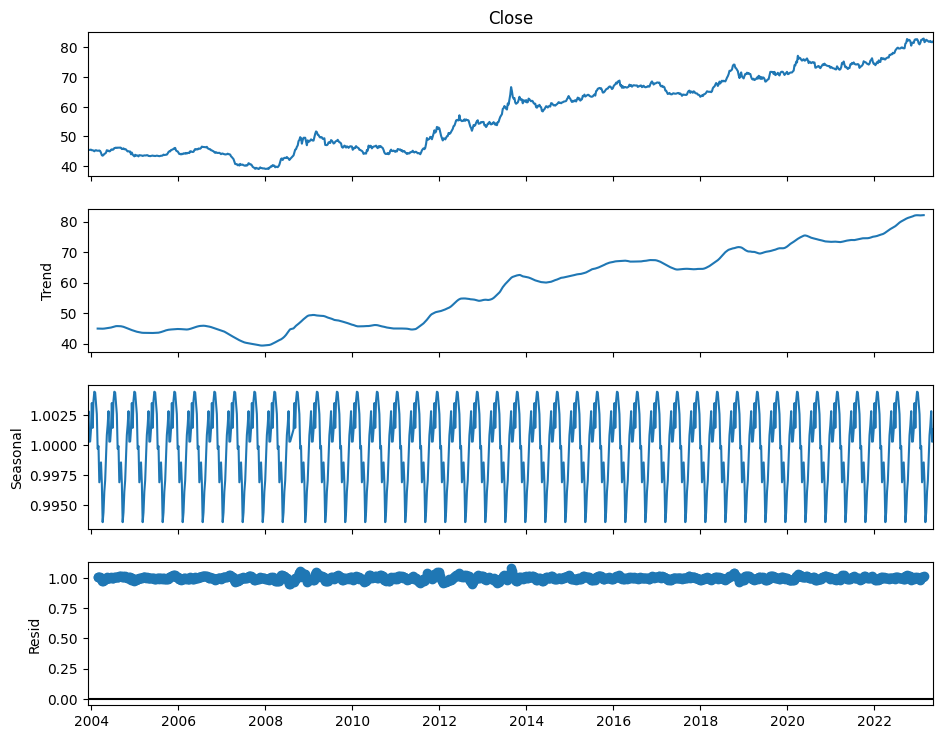

In [33]:
# ---------------------------
#    Seasonal Decomposition
# ---------------------------
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()

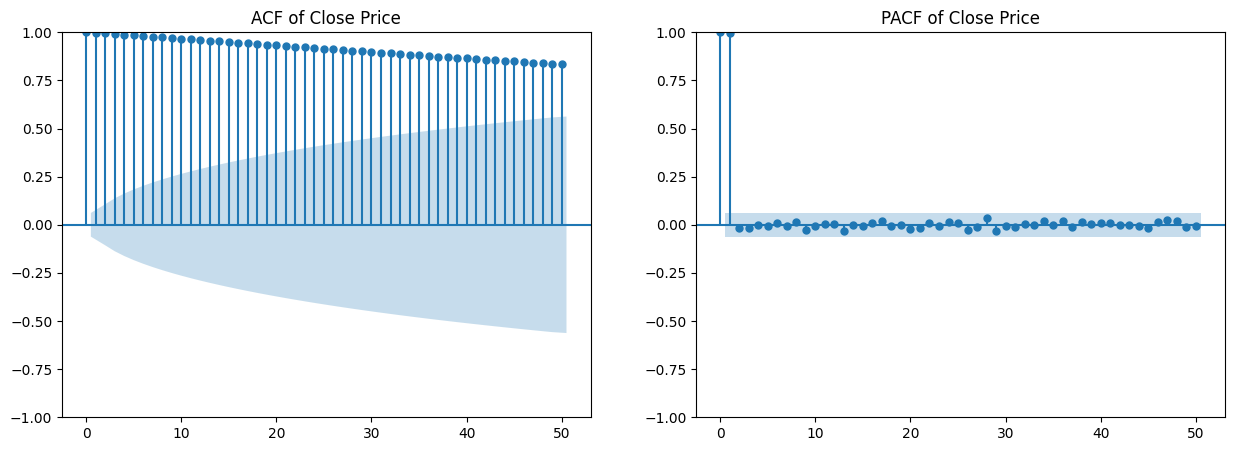

In [34]:
# ---------------------------
#    ACF and PACF
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(data["Close"], lags=50, ax=axes[0])
plot_pacf(data["Close"], lags=50, ax=axes[1])
axes[0].set_title("ACF of Close Price")
axes[1].set_title("PACF of Close Price")
plt.show()

In [35]:
# ---------------------------
#   Auto ARIMA
# ---------------------------
model_auto = auto_arima(data['Close'], seasonal=True, m=52, suppress_warnings=True)
print("Auto ARIMA suggested order:", model_auto.order)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Auto ARIMA suggested order: (2, 1, 0)


In [36]:
p, d, q = 2, 1, 0

In [37]:
# ---------------------------
#    SARIMAX Model
# ---------------------------
model = SARIMAX(data["Close"], order=(p, d, q),
                seasonal_order=(p, d, q, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -832.379
Date:                            Tue, 12 Aug 2025   AIC                           1674.758
Time:                                    12:34:31   BIC                           1698.507
Sample:                                         0   HQIC                          1683.853
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0291      0.029      1.014      0.311      -0.027       0.085
ar.L2          0.0604      0.028   

In [43]:
#------------------------------------------
#    Predictions
#------------------------------------------
forecast_steps = 60
predictions = fitted.get_forecast(steps=forecast_steps)
pred_ci = predictions.conf_int()
pred_ci

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,lower Close,upper Close
1013,80.459715,82.973558
1014,80.066991,83.674259
1015,79.895863,84.426408
1016,79.950990,85.250822
1017,79.458425,85.433648
1018,79.286298,85.868308
1019,79.219369,86.356998
1020,79.129348,86.782388
1021,78.710774,86.846651
1022,78.391875,86.983499


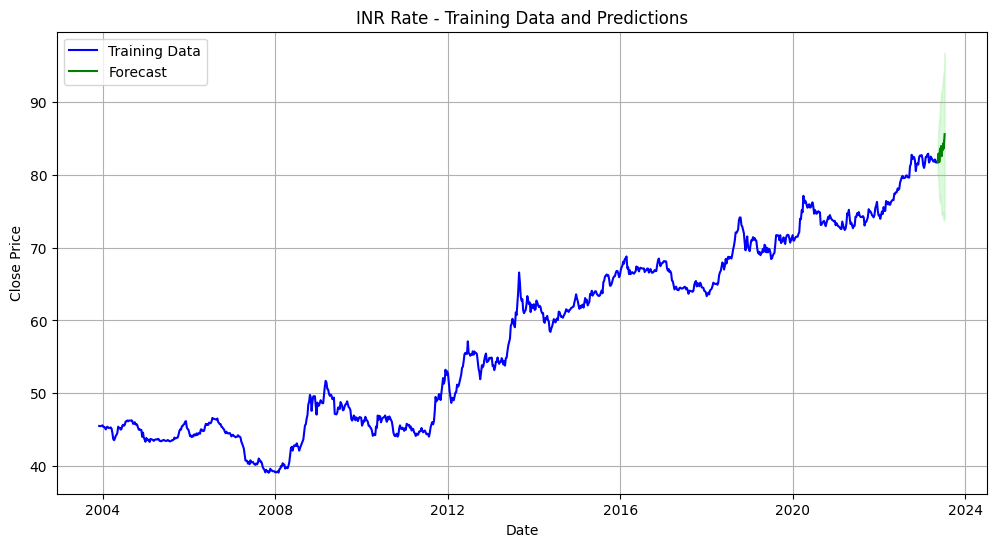

In [44]:
# ---------------------------
#        Forecast
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Training Data", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq="D")[1:],
         predictions.predicted_mean, label="Forecast", color='green')
plt.fill_between(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq="D")[1:],
                 pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title("INR Rate - Training Data and Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


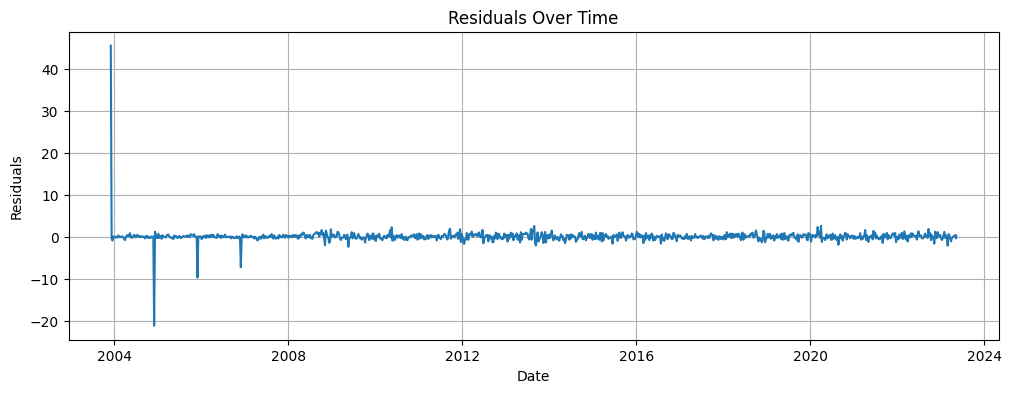

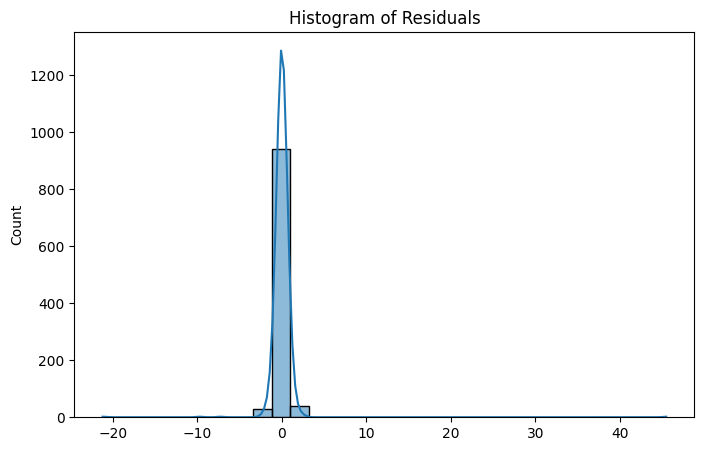

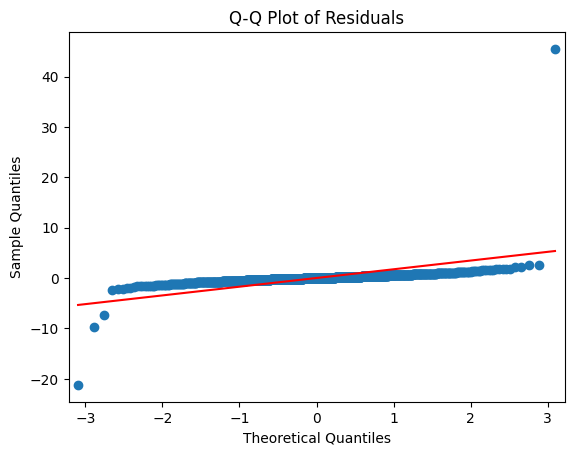

<Figure size 1200x500 with 0 Axes>

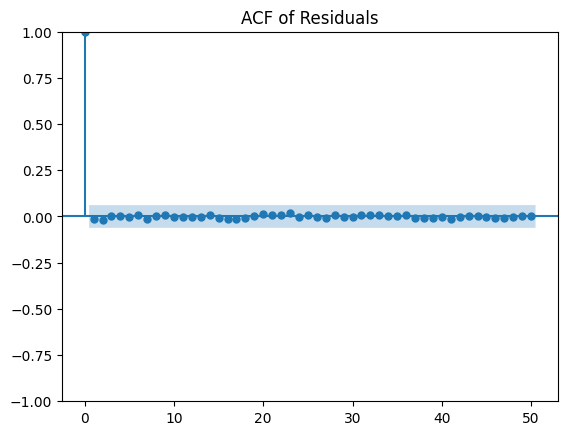

In [39]:
# ---------------------------
#  Residual Diagnostics
# ---------------------------
residuals = fitted.resid

plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.show()

qqplot(residuals, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

plt.figure(figsize=(12, 5))
plot_acf(residuals, lags=50)
plt.title("ACF of Residuals")
plt.show()


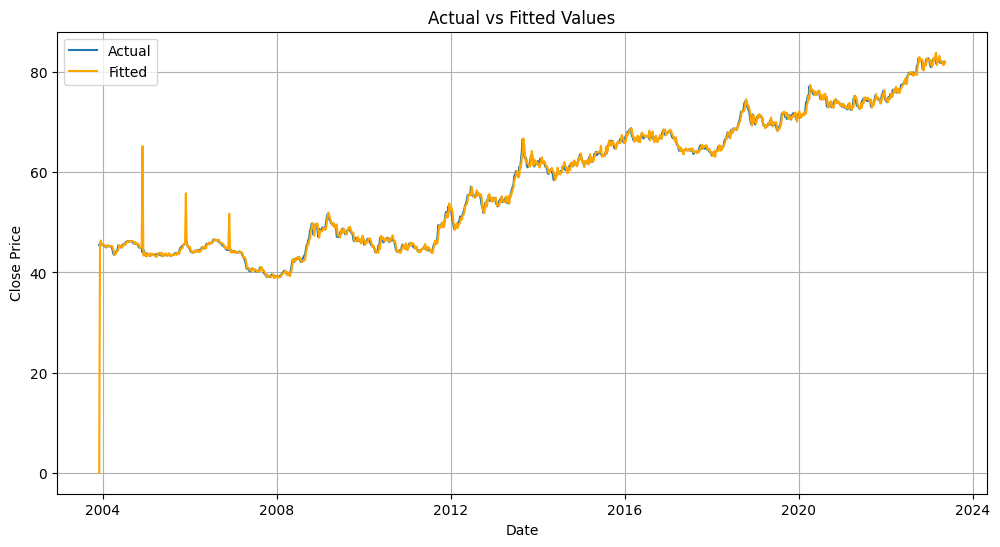

In [40]:
# ---------------------------
#  Actual vs Fitted
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Actual")
plt.plot(data.index, fitted.fittedvalues, label="Fitted", color='orange')
plt.title("Actual vs Fitted Values")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()